In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

/home/serena/MiscCS/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
foms_str = """_M_Dados_mut16
_M_Dados_mut17
_M_Dados_mut18
_M_Dados_mut19
_M_Dados_mut13
_M_Dados_mut14
_M_Dados_mut15
_M_Dados_mut20
_M_Tablero_mut5
_M_Tablero_mut8
_M_Tablero_mut9
_M_Jugador_mut0
_M_Jugador_mut19
_M_Jugador_mut16
_M_Jugador_mut15
_M_Jugador_mut20
_M_Tablero_mut21
_M_Tablero_mut41
_M_Tablero_mut43
_M_Tablero_mut44
_M_Tablero_mut45
_M_Tablero_mut10
_M_Tablero_mut12
_M_Tablero_mut13
_M_Tablero_mut15
_M_Tablero_mut18"""

inf_foms = foms_str.split("\n")
print("FOMs that cause inf loops:", len(inf_foms))

FOMs that cause inf loops: 26


In [3]:
with open("sampled_2oms.txt") as f:
    hom_str = f.read()

some_inf_2oms = hom_str.split("\n")
print("Num sampled HOMs:", len(some_inf_2oms))

Num sampled HOMs: 2349


In [4]:
fom_set = set(inf_foms)
with_inf_foms = []
without_inf_foms = []

for hom in some_inf_2oms:
    comprised_foms = hom.split(" ")
    contains_inf_fom = False
    for f in comprised_foms:
        if f in fom_set:
            contains_inf_fom = True
    
    if contains_inf_fom:
        with_inf_foms.append(hom)
    else:    
        without_inf_foms.append(hom)

print("HOMs that included a FOM in previous set:", len(with_inf_foms))
print("HOMs that did NOT include a FOM in previous set:", len(without_inf_foms))

HOMs that included a FOM in previous set: 2181
HOMs that did NOT include a FOM in previous set: 168


In [5]:
without_inf_foms

['_M_Jugador_mut109 _M_Dados_mut21',
 '_M_Jugador_mut109 _M_Tablero_mut20',
 '_M_Jugador_mut109 _M_Tablero_mut22',
 '_M_Jugador_mut106 _M_Dados_mut21',
 '_M_Jugador_mut106 _M_Tablero_mut20',
 '_M_Jugador_mut105 _M_Tablero_mut22',
 '_M_Jugador_mut105 _M_Tablero_mut26',
 '_M_Jugador_mut105 _M_Tablero_mut16',
 '_M_Jugador_mut108 _M_Dados_mut21',
 '_M_Jugador_mut108 _M_Tablero_mut20',
 '_M_Jugador_mut108 _M_Calle_mut21',
 '_M_Jugador_mut107 _M_Dados_mut21',
 '_M_Jugador_mut107 _M_Tablero_mut22',
 '_M_Jugador_mut102 _M_Dados_mut21',
 '_M_Jugador_mut102 _M_Tablero_mut20',
 '_M_Jugador_mut102 _M_Tablero_mut16',
 '_M_Jugador_mut101 _M_Dados_mut21',
 '_M_Jugador_mut101 _M_Jugador_mut3',
 '_M_Jugador_mut101 _M_Tablero_mut16',
 '_M_Jugador_mut104 _M_Dados_mut21',
 '_M_Jugador_mut104 _M_Tablero_mut22',
 '_M_Jugador_mut104 _M_Tablero_mut16',
 '_M_Jugador_mut103 _M_Tablero_mut22',
 '_M_Jugador_mut103 _M_Tablero_mut16',
 '_M_Calle_mut6 _M_Tablero_mut22',
 '_M_Calle_mut4 _M_Tablero_mut16',
 '_M_Calle_

In [6]:
def unique_FOMs(hom_set):
    not_included_foms = set()
    for hom in hom_set:
        comprised_foms = hom.split(" ")
        for f in comprised_foms:
            not_included_foms.add(f)
    return not_included_foms
            
print("unique FOMs from HOMs that do not contain FOMs from the previous set:", len(unique_FOMs(without_inf_foms)))

unique FOMs from HOMs that do not contain FOMs from the previous set: 106


                   count
_M_Tablero_mut16      53
_M_Dados_mut21        50
_M_Tablero_mut22      23
_M_Tablero_mut20      16
_M_Tablero_mut25       6
_M_Jugador_mut166      6
_M_Estacion_mut6       4
_M_Tablero_mut97       4
_M_Tablero_mut117      4
_M_Jugador_mut3        4


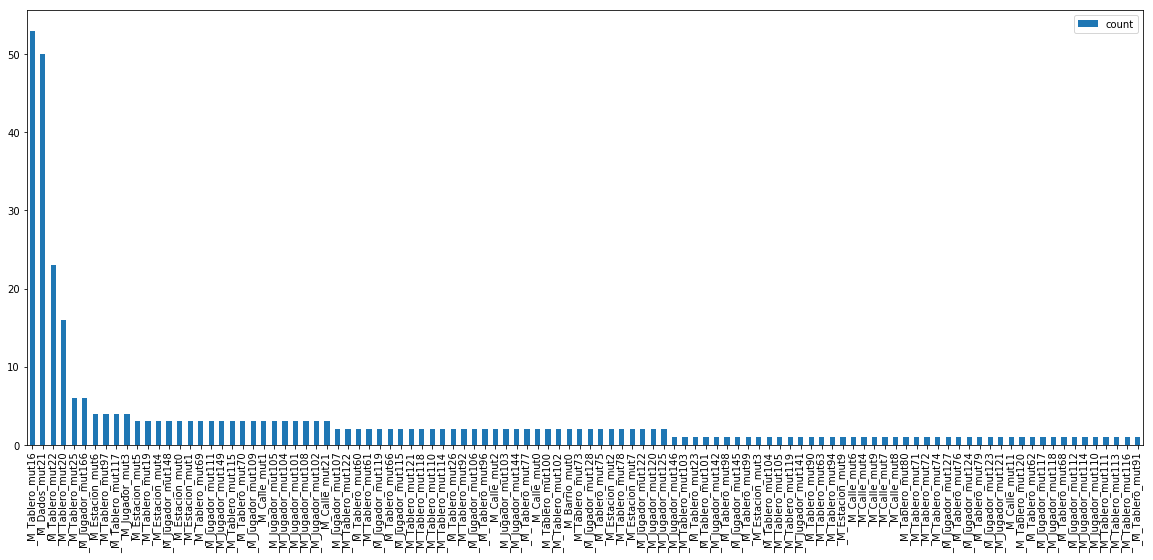

In [7]:
def fom_dist(hom_set):
    flattened_homs = []

    for hom in hom_set:
        comprised_foms = hom.split(" ")
        for f in comprised_foms:
            flattened_homs.append(f)

    fom_count = Counter(flattened_homs)
    df = pd.DataFrame.from_dict(fom_count, orient='index', columns=["count"])
    df.sort_values("count", ascending=False, inplace=True)
    print(df.head(10))
    df.plot(kind='bar', figsize=(20,8))
    plt.show()
    
fom_dist(without_inf_foms)

In [8]:
fom_set.add("_M_Tablero_mut16")
fom_set.add("_M_Dados_mut21")
fom_set.add("_M_Tablero_mut22")
fom_set.add("_M_Tablero_mut20")
fom_set.add("_M_Tablero_mut25")
fom_set.add("_M_Jugador_mut166")

new_with_inf_foms = []
new_without_inf_foms = []

for hom in some_inf_2oms:
    comprised_foms = hom.split(" ")
    contains_inf_fom = False
    for f in comprised_foms:
        if f in fom_set:
            contains_inf_fom = True
    
    if contains_inf_fom:
        new_with_inf_foms.append(hom)
    else:    
        new_without_inf_foms.append(hom)

print("HOMs that included a FOM in previous set:", len(new_with_inf_foms))
print("HOMs that did NOT include a FOM in previous set:", len(new_without_inf_foms))

HOMs that included a FOM in previous set: 2335
HOMs that did NOT include a FOM in previous set: 14


## Second order mutants without FOMs that cause infinite loops

In [9]:
with open("sampled_2oms_filtered.txt") as f:
    hom_str = f.read()

filtered_inf_2oms = hom_str.split("\n")
print("Num HOMs:", len(filtered_inf_2oms))

Num HOMs: 1168


In [10]:
print("unique FOMs: ", len(unique_FOMs(filtered_inf_2oms)))

unique FOMs:  377


                   count
_M_Tablero_mut20     368
_M_Tablero_mut22     352
_M_Dados_mut21       258
_M_Tablero_mut16     178
_M_Jugador_mut157      8
_M_Jugador_mut29       6
_M_Jugador_mut156      6
_M_Dados_mut8          6
_M_Tablero_mut60       6
_M_Calle_mut10         5


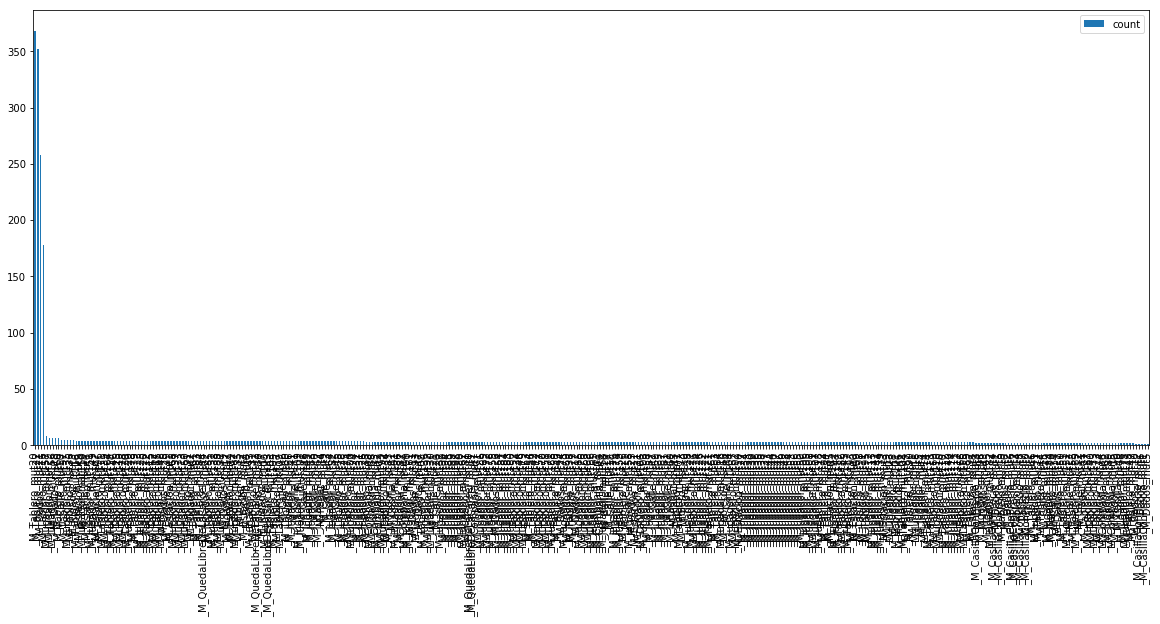

In [11]:
fom_dist(filtered_inf_2oms)

## Removing head of distribution

In [12]:
additional_fom_set = set()
additional_fom_set.add("_M_Tablero_mut20")
additional_fom_set.add("_M_Tablero_mut22")
additional_fom_set.add("_M_Dados_mut21")
additional_fom_set.add("_M_Tablero_mut16")


def filter(homs, foms):
    filtered = set()
    for hom in homs:
        comprised_foms = hom.split(" ")
        contains_inf_fom = False
        for f in comprised_foms:
            if f in foms:
                contains_inf_fom = True
        if not contains_inf_fom:
            filtered.add(hom)
    return filtered

further_filtered = filter(filtered_inf_2oms, additional_fom_set)
len(further_filtered)

14

In [13]:
print("unique FOMs: ", len(unique_FOMs(further_filtered)))
unique_FOMs(further_filtered)

unique FOMs:  12


{'_M_Calle_mut10',
 '_M_Dados_mut8',
 '_M_Dados_mut9',
 '_M_Jugador_mut135',
 '_M_Jugador_mut156',
 '_M_Jugador_mut157',
 '_M_Jugador_mut29',
 '_M_Jugador_mut3',
 '_M_Jugador_mut4',
 '_M_Tablero_mut36',
 '_M_Tablero_mut60',
 '_M_Tablero_mut97'}

                   count
_M_Jugador_mut157      5
_M_Jugador_mut156      3
_M_Jugador_mut29       2
_M_Tablero_mut60       2
_M_Calle_mut10         2
_M_Jugador_mut4        2
_M_Dados_mut8          2
_M_Jugador_mut3        2
_M_Tablero_mut97       2
_M_Dados_mut9          2


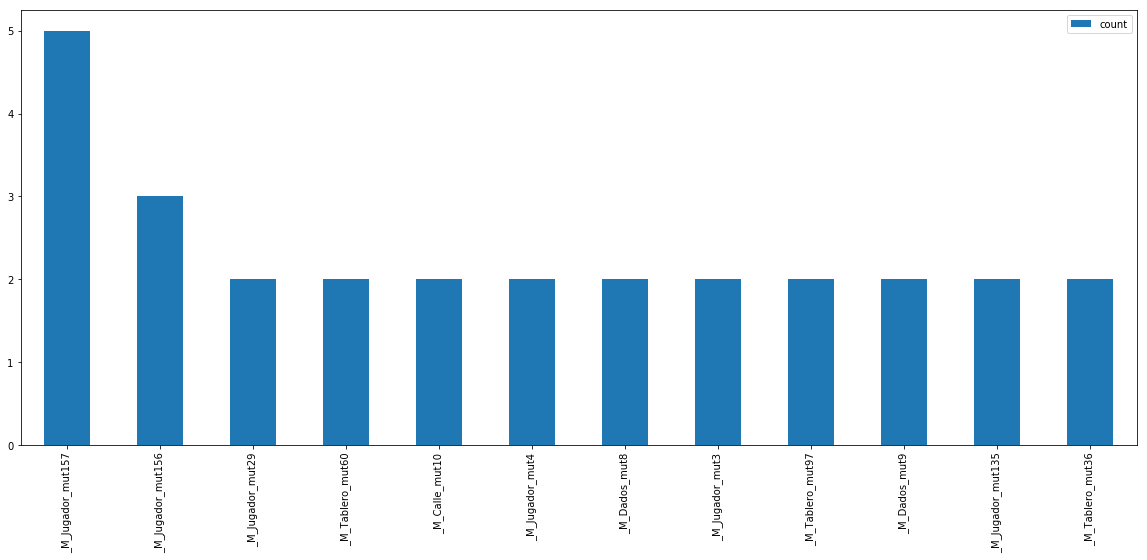

In [14]:
fom_dist(further_filtered)

In [15]:
additional_fom_set.add("_M_Jugador_mut157")
additional_fom_set.add("_M_Jugador_mut156")
additional_fom_set.add("_M_Calle_mut10")
additional_fom_set.add("_M_Jugador_mut3")
additional_fom_set.add("_M_Dados_mut9")
additional_fom_set.add("_M_Dados_mut8")
additional_fom_set.add("_M_Jugador_mut4")

further_filtered = filter(further_filtered, additional_fom_set)
print(len(further_filtered))
# print("unique FOMs: ", len(unique_FOMs(further_filtered)))
# fom_dist(further_filtered)

0


In [16]:
further_filtered

set()

In [17]:
additional_fom_set

{'_M_Calle_mut10',
 '_M_Dados_mut21',
 '_M_Dados_mut8',
 '_M_Dados_mut9',
 '_M_Jugador_mut156',
 '_M_Jugador_mut157',
 '_M_Jugador_mut3',
 '_M_Jugador_mut4',
 '_M_Tablero_mut16',
 '_M_Tablero_mut20',
 '_M_Tablero_mut22'}